# Class \#14 activities

# **Global temperature trends**
### Practice with SciPy linear regression and 1-D interpolation

<img src="https://drive.google.com/uc?export=view&id=1HyG9U2i5m7Oulk5pcV1T7FPA0EapqZ7A" width="700" />

*Image: Atmospheric CO2 from 1700 to yesterday. Source: [Scripps/UCSD](https://sioweb.ucsd.edu/programs/keelingcurve/).*


1. Run this cell to import libraries (note the new `SciPy` and `Matplotlib.dates` import statements!) and give Colab access to Google Drive.

2. When prompted, click the link to give Colab access to Google Drive, copy the code, and paste back into here.

In [1]:
# Import NumPy, Pandas, SciPy, Matplotlib, Datetime
import numpy as np
import pandas as pd
from scipy import stats, interpolate
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Give Colab access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Next, update the filepath below. To find the correct filepath, you can click on the left sidebar (folder icon), navigate to the CSV file in the Class #14 data folder, click the "..." on the file, and select "Copy path."

4. Add back slashes (`\`) in front of quotation marks in the filepath, as necessary.

In [2]:
# Filepath for Arctic sea ice concentration netCDF file
filepath = '/content/drive/MyDrive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/Zoom class slides and notebooks/2020-11-19 - class #14 - data/NASA_GISS_global_temp.csv'

5. Run the code cells to load and display the CSV file using `Pandas`. First, we'll parse the years as integer numbers. Then, we'll create a second version with the years parsed as `datetime` objects.

6. Notice that there are three columns: **Year** (which is the `index`), **Temp_anomaly** (which has units of °C), and **Temp_anomaly_smooth** (which is a smoothed, or filtered, version of Temp_anomaly).

In [3]:
# Load CSV file using Pandas with 2 different settings
global_temp = pd.read_csv(filepath,index_col='Year')                          # loaded years as integer numbers
global_temp_dt = pd.read_csv(filepath,index_col='Year',parse_dates=['Year'])  # loaded years as Datetime objects

# Display CSV file
display(global_temp)
display(global_temp_dt)

,Temp_anomaly,Temp_anomaly_smooth
Year,,
1880,-0.16,-0.08
1881,-0.07,-0.12
1882,-0.10,-0.16
1883,-0.16,-0.19
1884,-0.27,-0.23
...,...,...
2015,0.90,0.83
2016,1.01,0.87
2017,0.92,0.91


,Temp_anomaly,Temp_anomaly_smooth
Year,,
1880-01-01,-0.16,-0.08
1881-01-01,-0.07,-0.12
1882-01-01,-0.10,-0.16
1883-01-01,-0.16,-0.19
1884-01-01,-0.27,-0.23
...,...,...
2015-01-01,0.90,0.83
2016-01-01,1.01,0.87
2017-01-01,0.92,0.91


# **Breakout rooms: group 1 — linear regression (entire time series)**

First, assign roles:
> * **Timekeeper:** keep things moving
>
> * **Coder:** share your screen and write the code based on input from everyone else
>
> * **Reporter:** before the end of the session, remind the Coder to paste their code into this [Google Document](https://docs.google.com/document/d/1UKJF4KzYkNGyVrQoyRU3FSopmGlBJD4zBNdAI3En8fU/edit?usp=sharing)

If you need help, check out the Video Lesson #14 slides, [available here](https://drive.google.com/file/d/19x5N4Xl4_cJfdoU7ilA55eXKP7olZrDl/view?usp=sharing).

The slope from 1880-2019 is: 0.007 °C/year (using the integer year version)
The r^2 value is: 0.75
The p-value is: 0.0
The slope from 1880-2019 is: 0.007 °C/year (using the Datetime version)


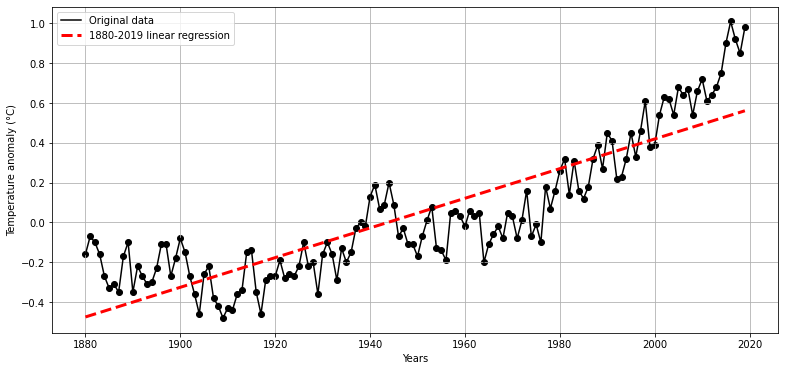

In [5]:
# 1. Make a black line plot of the 1980-2019 time series.
#    Add scatter points for each year.
#    Add a grid and axis labels.
plt.figure(figsize=(13,6))
plt.plot(global_temp.index,global_temp['Temp_anomaly'],c='k',label='Original data')
plt.scatter(global_temp.index,global_temp['Temp_anomaly'],c='k')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Temperature anomaly (°C)')

# 2. Use SciPy's linregress() to calculate a linear regression on the entire 1880-2019 time series.
#    For this, use the variable "global_temp" (where the years are integer numbers).
#    This should be just one line of code.
slope, intercept, rvalue, pvalue, stderr = stats.linregress(global_temp.index,global_temp['Temp_anomaly'])
# or you can send some outputs to a "throwaway" underscore:
slope, _, rvalue, pvalue, _ = stats.linregress(global_temp.index,global_temp['Temp_anomaly'])

# 3. Print the slope (including units), r-squared value, and p-value.
#    Round each to 3 decimal places.
print('The slope from 1880-2019 is:',round(slope,3),'°C/year (using the integer year version)')
print('The r^2 value is:',round(rvalue**2,3))
print('The p-value is:',round(pvalue,3))

# 4. Repeat Part #1, but use the variable "global_temp_dt" (where the years are Datetime objects).
#    Remember you have to convert the Datetime array of years to numbers.
slope_days, _, _, _, _ = stats.linregress(mdates.date2num(global_temp_dt.index),global_temp_dt['Temp_anomaly'])

# 5. Print the slope from the regression in Part #3, using units of °C/year.
print('The slope from 1880-2019 is:',round(365.25*slope_days,3),'°C/year (using the Datetime version)')

# 6. In these Python comment lines, answer the following questions:
#    a. How much variance in the data is explained by the regression?
#           A: ~75%
#    b. Is the 1880-2019 trend significant at the 95% confidence level?
#           A: Yes, because it's basically zero, which is less than 0.05
#    c. Is a linear regression appropriate for this data?
#           A: Probably not - data looks more like a quadratic curve

# 7. If you have time, on your plot from earlier, draw the regression line that you just calculated.
#    Make it a red dashed line.
#    Label it and add a legend.
x_values = global_temp.index
y_values = slope * x_values + intercept
plt.plot(x_values,y_values,'r--',lw=3,label='1880-2019 linear regression')
plt.legend()

# **Breakout rooms: group 2 — linear regression (1880-1969, 1970-2019)**

First, assign roles:
> * **Timekeeper:** keep things moving
>
> * **Coder:** share your screen and write the code based on input from everyone else
>
> * **Reporter:** before the end of the session, remind the Coder to paste their code into this [Google Document](https://docs.google.com/document/d/1UKJF4KzYkNGyVrQoyRU3FSopmGlBJD4zBNdAI3En8fU/edit?usp=sharing)

If you need help, check out the Video Lesson #14 slides, [available here](https://drive.google.com/file/d/19x5N4Xl4_cJfdoU7ilA55eXKP7olZrDl/view?usp=sharing).

The slope from 1880-1969 is: 0.004 °C/year
The r^2 value for 1980-1969 is: 0.345
The slope from 1970-2019 is: 0.019 °C/year
The r^2 value for 1970-2019 is: 0.895


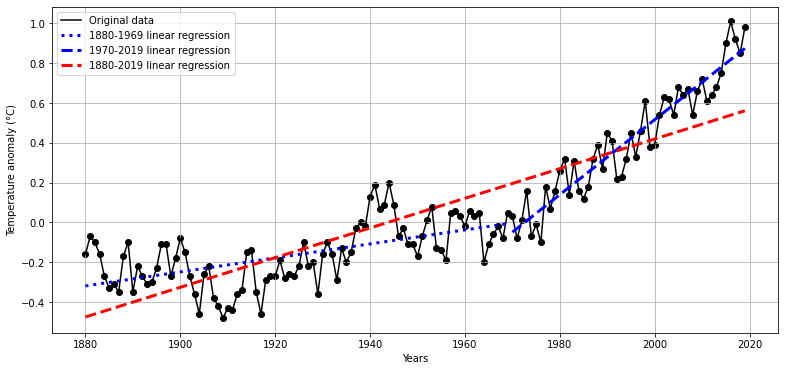

In [6]:
# 1. Make a black line plot of the 1980-2019 time series.
#    Add scatter points for each year.
#    Add a grid and axis labels.
plt.figure(figsize=(13,6))
plt.plot(global_temp.index,global_temp['Temp_anomaly'],c='k',label='Original data')
plt.scatter(global_temp.index,global_temp['Temp_anomaly'],c='k')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Temperature anomaly (°C)')

# 2. Create two new variables:
#    - Select years 1880-1969 of the "global_temp" data set and save the data as "gt_old".
#    - Select years 1970-2019 of the "global_temp" data set and save the data as "gt_new".
gt_old = global_temp.loc[1880:1969]
gt_new = global_temp.loc[1970:2019]

# 3. Use SciPy's linregress() to calculate two separate linear regressions on the two time series "gt_old" and "gt_new".
#    Give the output variables slightly different names (e.g. "slope_old" and "slope_new").
slope_old, intercept_old, rvalue_old, _, _ = stats.linregress(gt_old.index,gt_old['Temp_anomaly'])
slope_new, intercept_new, rvalue_new, _, _ = stats.linregress(gt_new.index,gt_new['Temp_anomaly'])

# 4. Print the slope (including units) and r-squared values for each time segment (1880-1969, 1970-2019).
#    Round each to 3 decimal places.
print('The slope from 1880-1969 is:',round(slope_old,3),'°C/year')
print('The r^2 value for 1980-1969 is:',round(rvalue_old**2,3))
print('The slope from 1970-2019 is:',round(slope_new,3),'°C/year')
print('The r^2 value for 1970-2019 is:',round(rvalue_new**2,3))

# 5. In these Python comment lines, answer the following questions:
#    a. What conclusion would you draw by comparing the slopes from 1880-1969 and 1970-2019?
#           A: Warming has accelerated
#    b. What conclusion would you draw by comparing the r^2 values from 1880-1969 and 1970-2019?
#           A: Temperature variability is more fully explained by the second regression
#    c. Would a linear regression on the full data (from 1880-2019) be appropriate?
#           A: No, the data might be approximately piecewise linear, but not fully linear

# 6. If you have time, on your plot from earlier, draw the two regression lines that you just calculated.
#    Make one a blue dotted line and the other a blue dashed line.
#    Label them and add a legend.
x_values_old = gt_old.index
y_values_old = slope_old * x_values_old + intercept_old
plt.plot(x_values_old,y_values_old,'b:',lw=3,label='1880-1969 linear regression')
x_values_new = gt_new.index
y_values_new = slope_new * x_values_new + intercept_new
plt.plot(x_values_new,y_values_new,'b--',lw=3,label='1970-2019 linear regression')
plt.plot(x_values,y_values,'r--',lw=3,label='1880-2019 linear regression')
plt.legend()

# **Breakout rooms: group 3 — 1-D interpolation (1990-1999)**

First, assign roles:
> * **Timekeeper:** keep things moving
>
> * **Coder:** share your screen and write the code based on input from everyone else
>
> * **Reporter:** before the end of the session, remind the Coder to paste their code into this [Google Document](https://docs.google.com/document/d/1UKJF4KzYkNGyVrQoyRU3FSopmGlBJD4zBNdAI3En8fU/edit?usp=sharing)

If you need help, check out the Video Lesson #14 slides, [available here](https://drive.google.com/file/d/19x5N4Xl4_cJfdoU7ilA55eXKP7olZrDl/view?usp=sharing).

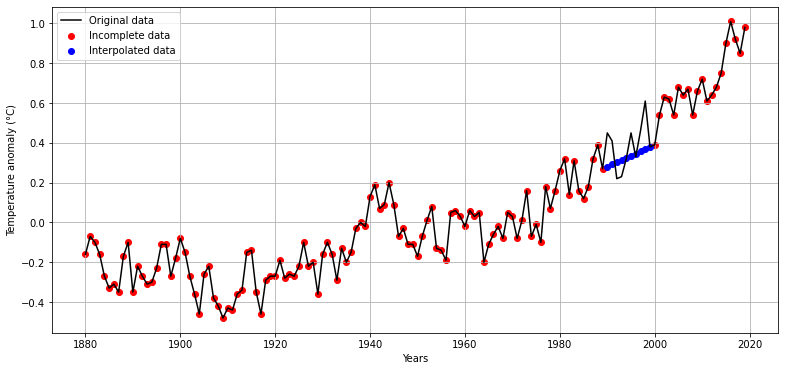

In [8]:
# 1. Create a copy of "global_temp" and save it as a new variable, "gt_missing_1990s".
gt_missing_1990s = global_temp.copy()

# 2. Run the following lines of code to delete years 1990-1999 from "gt_missing_1990s".
years_missing_1990s = range(1990,2000)
gt_missing_1990s = gt_missing_1990s.drop(years_missing_1990s)

# 3. Use SciPy's interp1d() to linearly interpolate the data in "gt_missing_1990s"
#    to the missing years, which are stored in the variable "years_missing_1990s".
interp_func = interpolate.interp1d(gt_missing_1990s.index,gt_missing_1990s['Temp_anomaly'],
                                   kind='linear',bounds_error=False,fill_value=np.NaN)
gt_new_1990s = interp_func(years_missing_1990s)

# 4. Make a black solid line plot of the original 1880-2019 time series in "global_temp".
#    Add a grid and axis labels.
plt.figure(figsize=(13,6))
plt.plot(global_temp.index,global_temp['Temp_anomaly'],c='k',label='Original data')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Temperature anomaly (°C)')

# 5. On the same plot, add red scatter points for the incomplete time series in "gt_missing_1990s".
plt.scatter(gt_missing_1990s.index,gt_missing_1990s['Temp_anomaly'],c='r',label='Incomplete data')

# 6. On the same plot, add blue scatter points for the temperatures interpolated to years in "years_missing_1990s".
plt.scatter(years_missing_1990s,gt_new_1990s,c='b',label='Interpolated data')

# 7. Add label arguments to your plot functions above, then add a legend.
plt.legend();

# 8. In these Python comment lines, answer the following questions:
#    a. How would you rate the accuracy of the interpolated temperature estimates for 1990-1999?
#           A: Decent, since they pass through the original (real) data
#    b. How would the interpolation look different if data were missing from 1990-2001 instead of 1990-1999?
#           A: Very different; this shows how sensitive interpolation is to start/end values

# **Breakout rooms: group 4 — 1-D interpolation (1935-1945)**

First, assign roles:
> * **Timekeeper:** keep things moving
>
> * **Coder:** share your screen and write the code based on input from everyone else
>
> * **Reporter:** before the end of the session, remind the Coder to paste their code into this [Google Document](https://docs.google.com/document/d/1UKJF4KzYkNGyVrQoyRU3FSopmGlBJD4zBNdAI3En8fU/edit?usp=sharing)

If you need help, check out the Video Lesson #14 slides, [available here](https://drive.google.com/file/d/19x5N4Xl4_cJfdoU7ilA55eXKP7olZrDl/view?usp=sharing).

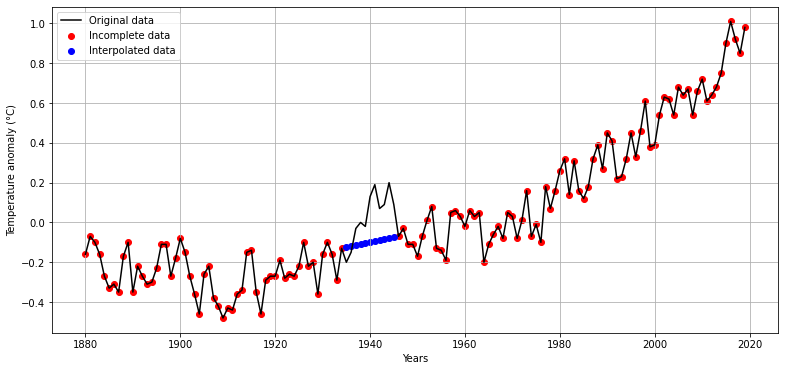

In [9]:
# 1. Create a copy of "global_temp" and save it as a new variable, "gt_missing_ww2".
gt_missing_ww2 = global_temp.copy()

# 2. Run the following lines of code to delete years 1935-1945 from "gt_missing_ww2".
years_missing_ww2 = range(1935,1946)
gt_missing_ww2 = gt_missing_ww2.drop(years_missing_ww2)

# 3. Use SciPy's interp1d() to linearly interpolate the data in "gt_missing_ww2"
#    to the missing years, which are stored in the variable "years_missing_ww2".
interp_func = interpolate.interp1d(gt_missing_ww2.index,gt_missing_ww2['Temp_anomaly'],
                                   kind='linear',bounds_error=False,fill_value=np.NaN)
gt_new_ww2 = interp_func(years_missing_ww2)

# 4. Make a black solid line plot of the original 1880-2019 time series in "global_temp".
#    Add a grid and axis labels.
plt.figure(figsize=(13,6))
plt.plot(global_temp.index,global_temp['Temp_anomaly'],c='k',label='Original data')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Temperature anomaly (°C)')

# 5. On the same plot, add red scatter points for the incomplete time series in "gt_missing_ww2".
plt.scatter(gt_missing_ww2.index,gt_missing_ww2['Temp_anomaly'],c='r',label='Incomplete data')

# 6. On the same plot, add blue scatter points for the temperatures interpolated to years in "years_missing_ww2".
plt.scatter(years_missing_ww2,gt_new_ww2,c='b',label='Interpolated data')

# 7. Add label arguments to your plot functions above, then add a legend.
plt.legend();

# 8. In these Python comment lines, answer the following questions:
#    a. How would you rate the accuracy of the interpolated temperature estimates for 1935-1945?
#         A: Quite poor; the interpolated points miss the temporary bump in temperature
#    b. What does this experience tell you about linear interpolation?
#         A: Linear interpolation is only good when the data are behaving linearly, 
#            and the start, middle, and end values are not outliers